# Title

Purpose

Dict

## 1. Data Pre-Processing 

In [161]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [162]:
# kaggle: https://www.kaggle.com/uciml/sms-spam-collection-dataset

data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [163]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

data.columns = ['labels', 'data']

data['labels'] = data['labels'].map({'ham': 0, 'spam': 1})

data.head()

,labels,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


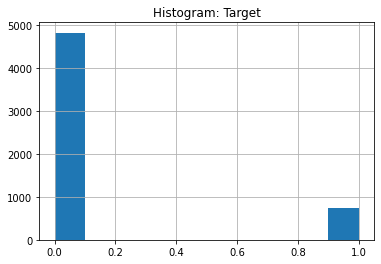

In [164]:
plt.hist(data['labels'])
plt.title('Histogram: Target')
plt.grid()
plt.show()


In [165]:
Y = data['labels'].values

X_train, X_test, y_train, y_test = train_test_split(data['data'],Y, test_size=0.33, shuffle=True, stratify=Y)

In [166]:
vocab_size = 20000
tokenizer = Tokenizer(num_words=vocab_size, lower=True)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)


In [167]:
train_lengths = [len(x) for x in sequences_train]
test_lengths = [len(x) for x in sequences_test]

In [168]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'There are {V} unique tokens.')

There are 7271 unique tokens.


In [169]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [170]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [171]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [172]:
X_train_tensor = torch.from_numpy(data_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(data_test)
y_test_tensor = torch.from_numpy(y_test)

In [173]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=32, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=64, 
                                          shuffle=False)

In [174]:
for inputs, targets in train_loader:
  print("inputs:", inputs, "shape:", inputs.shape)
  print("targets:", targets, "shape:", targets.shape)
  break

inputs: tensor([[   0,    0,    0,  ...,    6,   75, 2260],
        [   0,    0,    0,  ...,  773,    2, 1955],
        [   0,    0,    0,  ..., 2511,   83,   84],
        ...,
        [   0,    0,    0,  ..., 4503,  396,   86],
        [   0,    0,    0,  ...,   78,    9,  425],
        [   0,    0,    0,  ...,  258,    2, 3378]], dtype=torch.int32) shape: torch.Size([32, 189])
targets: tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1]) shape: torch.Size([32])


## 2. Natural Language Processing: 

In [175]:
from RNN_NLP import NLP
from RNN_NLP import training_nn

model = NLP(V+1, 50, 16, 1, 1, device = device)
model.to(device)
criterion = nn.BCEWithLogitsLoss(reduce='none')
optimizer = torch.optim.Adam(model.parameters())
w = torch.tensor([(4825+747)/4825, (4825+747)/747])
train_losses, test_losses, model = training_nn(model, criterion, optimizer, train_loader, test_loader, epochs=30, early_stop = 1, device= device, weight = w )

C:\Users\Rafael Pavan\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 1/30, Train Loss: 0.9150,       Test Loss: 0.7642, Flag: 0
Epoch 2/30, Train Loss: 0.7169,       Test Loss: 0.6302, Flag: 0
Epoch 3/30, Train Loss: 0.5505,       Test Loss: 0.4770, Flag: 0
Epoch 4/30, Train Loss: 0.3857,       Test Loss: 0.3421, Flag: 0
Epoch 5/30, Train Loss: 0.2592,       Test Loss: 0.2591, Flag: 0
Epoch 6/30, Train Loss: 0.1786,       Test Loss: 0.2265, Flag: 0
Epoch 7/30, Train Loss: 0.1343,       Test Loss: 0.2259, Flag: 0
Epoch 8/30, Train Loss: 0.1027,       Test Loss: 0.1825, Flag: 0
Epoch 9/30, Train Loss: 0.0789,       Test Loss: 0.1680, Flag: 0
Epoch 10/30, Train Loss: 0.0651,       Test Loss: 0.1658, Flag: 0
Epoch 11/30, Train Loss: 0.0566,       Test Loss: 0.1970, Flag: 1
End of the Algorithm. The Neural Network didnt improve in the last 2 epochs


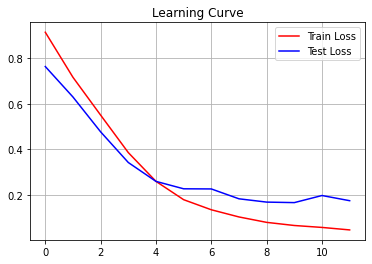

In [176]:
from RNN_NLP import plot_learning_curves

plot_learning_curves(train_losses, test_losses, title='Learning Curve')

In [177]:
from RNN_NLP import accuracy 
from RNN_NLP import plot_confusion_matrix_
y_test, p_test = accuracy(model,train_loader,test_loader)

Train acc: 0.9981, Test acc: 0.9804


Confusion matrix
[[1587    5]
 [  31  216]]


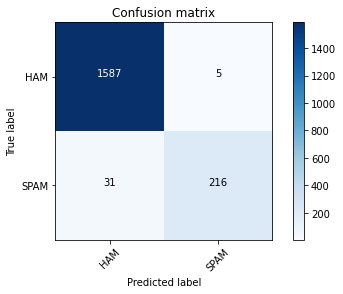

In [178]:
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix_(cm, ['HAM', 'SPAM'])


In [179]:
from sklearn.metrics import classification_report

print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1592
         1.0       0.98      0.87      0.92       247

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



In [180]:
spam_data = data['data'][data['labels']==1]

spam_data = spam_data.str.lower()

spam_data.head()

2     free entry in 2 a wkly comp to win fa cup fina...
5     freemsg hey there darling it's been 3 week's n...
8     winner!! as a valued network customer you have...
9     had your mobile 11 months or more? u r entitle...
11    six chances to win cash! from 100 to 20,000 po...
Name: data, dtype: object

In [181]:
all_spam = spam_data.str.split(' ')

all_spam.head()

2     [free, entry, in, 2, a, wkly, comp, to, win, f...
5     [freemsg, hey, there, darling, it's, been, 3, ...
8     [winner!!, as, a, valued, network, customer, y...
9     [had, your, mobile, 11, months, or, more?, u, ...
11    [six, chances, to, win, cash!, from, 100, to, ...
Name: data, dtype: object

In [182]:
import string

spam_cleaned = []

for text in all_spam:

    text =  [x.strip(string.punctuation) for x in text]
    spam_cleaned.append(text)

text_spam = [" ".join(text) for text in spam_cleaned]

final_text_spam = " ".join(text_spam)

final_text_spam[:500]


"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's freemsg hey there darling it's been 3 week's now and no word back i'd like some fun you up for it still tb ok xxx std chgs to send å£1.50 to rcv winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only had your mobile 11 months or more u r entitled "

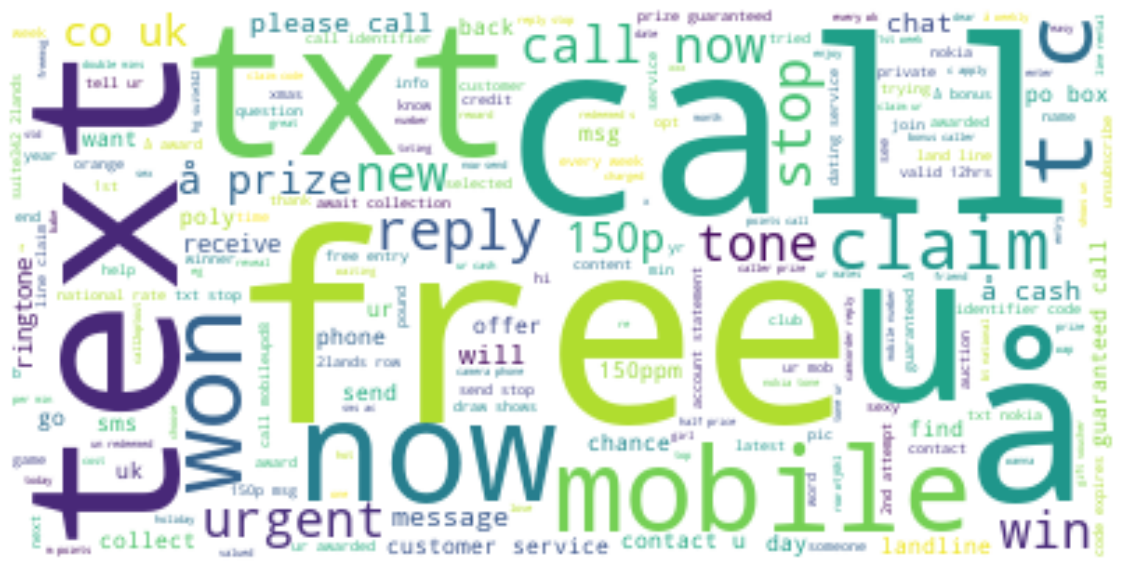

In [183]:
wordcloud_spam = WordCloud(background_color="white").generate(final_text_spam)

plt.figure(figsize = (20,20))

plt.imshow(wordcloud_spam, interpolation='bilinear')

plt.axis("off")

plt.show()

In [187]:
test_sent = ['Hello Rafael, this is urgent! Call me now']


test_seq = tokenizer.texts_to_sequences(test_sent)

test_padded = pad_sequences(test_seq, maxlen=T)

if model(torch.from_numpy(test_padded).long().to(device)) > 0:
    print('spam') 
else: print('ham')

ham


In [203]:
print(spam_data.iloc[12])

test_sent = [spam_data.iloc[12]]

test_seq = tokenizer.texts_to_sequences(test_sent)

test_padded = pad_sequences(test_seq, maxlen=T)

if model(torch.from_numpy(test_padded).long().to(device)) > 0:
    print('spam') 
else: print('ham')

as a valued customer, i am pleased to advise you that following recent review of your mob no. you are awarded with a å£1500 bonus prize, call 09066364589
spam
